In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AllBoroughs2012-2019.csv",low_memory=False)

# Data Cleaning
- Select related columns
- Drop cells contained '-', feet contained 0 and year before 1900(not valuable for us) 

In [3]:
price = df.iloc[:,[0,1,2,15,16,19]]
price = price[~(price['SALE PRICE'].str.contains('-') | price['GROSS SQUARE FEET'].str.contains('-'))]
price = price[~((price['GROSS SQUARE FEET'] == 0)|(price['YEAR BUILT'] < 1900))]

- add one column to caculate unit price and drop invail values

In [4]:
price['dollar_per_square'] = price['SALE PRICE'].astype(float)/price['GROSS SQUARE FEET'].astype(float)
price['dollar_per_square'].replace(np.inf, np.nan,inplace=True)
price.dropna(inplace = True)
price = price[price['dollar_per_square']<10000]

# What is percentage of sale-price is 0?

In [5]:
((price['SALE PRICE'].astype(float) == 0.0000000).sum())/(len(price.index))

0.3310904752913713

# Which borough has lower percentage of 0 price selling?

In [6]:
price['NEIGHBORHOOD'] = price['NEIGHBORHOOD'].str.strip()

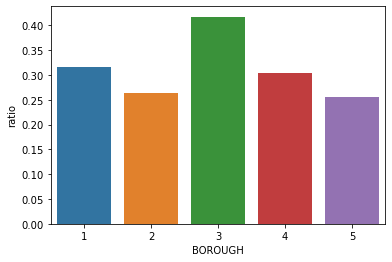

In [7]:
nosale1 = price.loc[price['dollar_per_square']==0].groupby('BOROUGH').size()
allsale1 = price.groupby('BOROUGH')['dollar_per_square'].size()
ratio1 = nosale1 / allsale1
ratio1 = ratio1.to_frame(name="ratio").reset_index()
sns.barplot(x = 'BOROUGH',y = 'ratio', data = ratio1);

# What is top 10 neighborhood that have highest ratio of 0 sale price?

In [8]:
nosale2 = price.loc[price['dollar_per_square']==0].groupby('NEIGHBORHOOD').size()
allsale2 = price.groupby('NEIGHBORHOOD')['dollar_per_square'].size()
ratio2 = nosale2 / allsale2
ratio2 = ratio2.nlargest(10).to_frame(name="ratio")
ratio2

,ratio
NEIGHBORHOOD,
BRONX-UNKNOWN,1.000000
UPPER BAY,1.000000
WILLIAMSBURG-CENTRAL,0.688931
BROOKLYN-UNKNOWN,0.625000
FLUSHING MEADOW PARK,0.571429
BOROUGH PARK,0.542098
MORNINGSIDE HEIGHTS,0.538462
CARROLL GARDENS,0.500000
COBBLE HILL,0.500000


# What is top 10 building class category that have highest ratio of 0 sale price?

In [9]:
nosale3 = price.loc[price['dollar_per_square']==0].groupby('BUILDING CLASS CATEGORY').size()
allsale3 = price.groupby('BUILDING CLASS CATEGORY')['dollar_per_square'].size()
ratio3 = nosale3 / allsale3
ratio3 = ratio3.nlargest(10).to_frame(name="ratio")
ratio3

,ratio
BUILDING CLASS CATEGORY,
11 SPECIAL CONDO BILLING LOTS,1.000000
24 TAX CLASS 4 - UTILITY BUREAU PROPERTIES,1.000000
39 TRANSPORTATION FACILITIES,1.000000
40 SELECTED GOVERNMENTAL FACILITIES,1.000000
46 CONDO STORE BUILDINGS,1.000000
05 TAX CLASS 1 VACANT LAND,0.866667
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,0.852941
11A CONDO-RENTALS,0.826087
31 COMMERCIAL VACANT LAND,0.769231


# Is there pattern of selling days or months?

In [10]:
date = df.iloc[:,-1:]
date['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
date.head()

,SALE DATE
0,2012-04-05
1,2012-08-31
2,2012-12-27
3,2012-03-07
4,2012-10-15


In [11]:
date['weekday'] = date['SALE DATE'].dt.dayofweek
date['month'] = date['SALE DATE'].dt.month
date['count'] = 1
date.head()

,SALE DATE,weekday,month,count
0,2012-04-05,3,4,1
1,2012-08-31,4,8,1
2,2012-12-27,3,12,1
3,2012-03-07,2,3,1
4,2012-10-15,0,10,1


In [12]:
date_pivot = date.pivot_table(index='weekday', columns='month', values='count',aggfunc=np.sum)

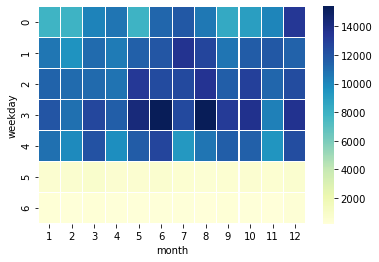

In [13]:
sns.heatmap(date_pivot,cmap="YlGnBu",linewidths=.2);

# What is distruibution of year's selling?

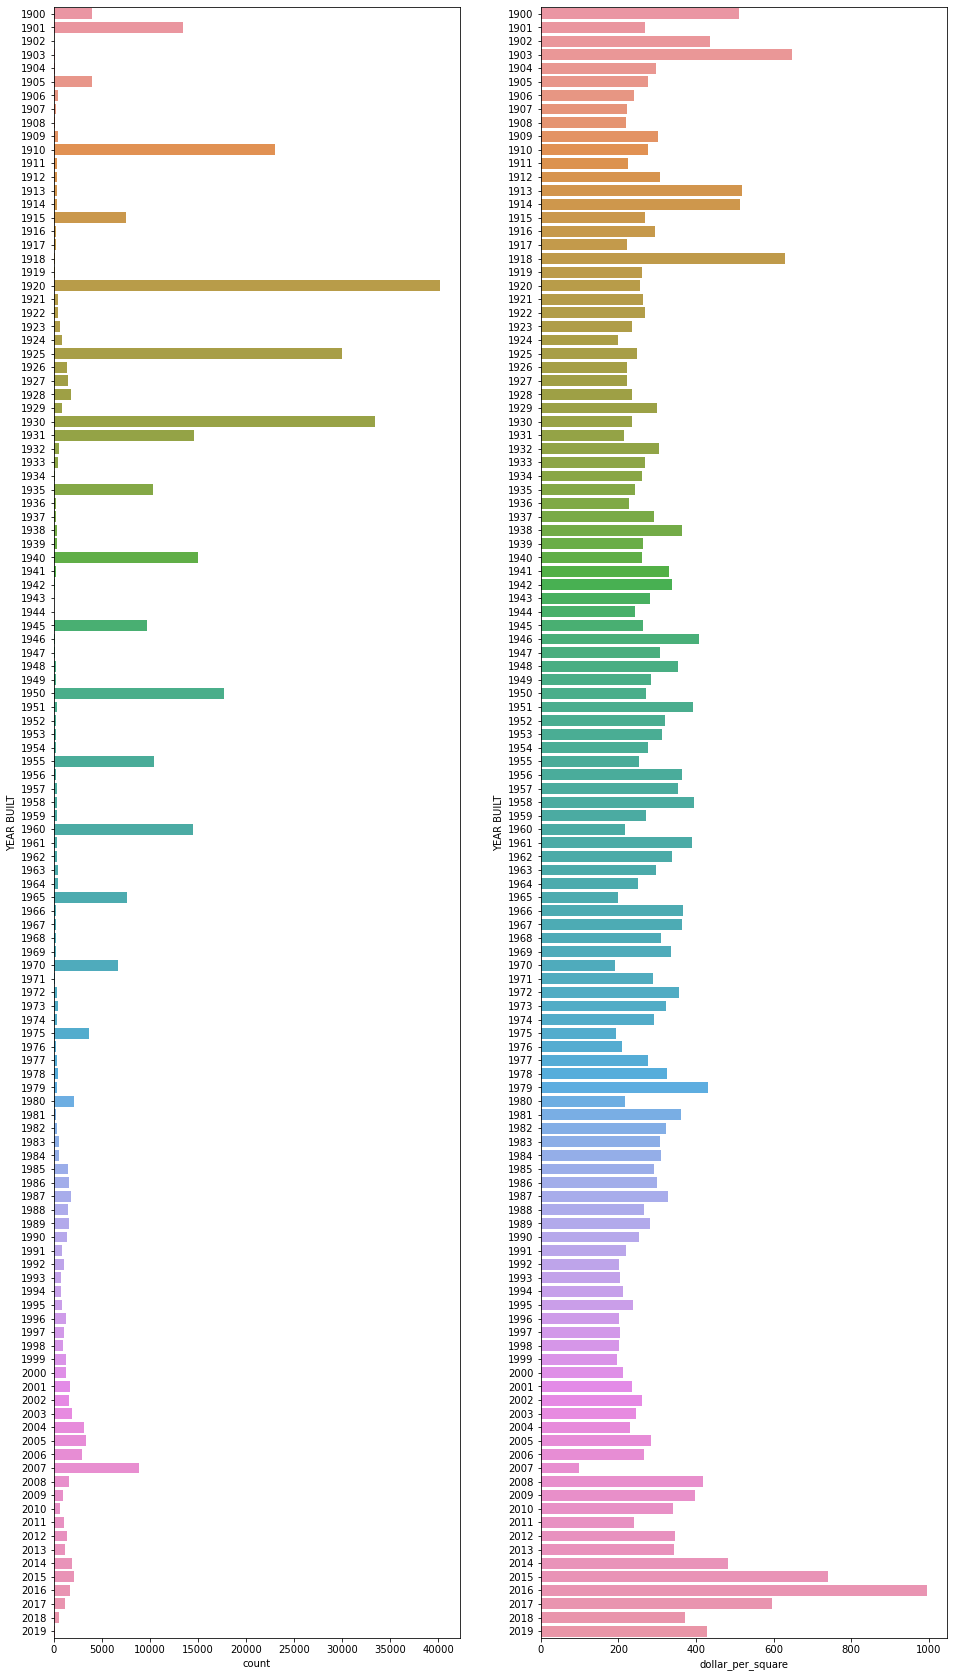

In [14]:
price['YEAR BUILT'] = price['YEAR BUILT'].astype(int)
year = price.groupby('YEAR BUILT',as_index=False)['dollar_per_square'].mean()
f, ax = plt.subplots(1,2,figsize=(16,30))
sns.countplot(y = 'YEAR BUILT', data = price, orient = 'h',ax=ax[0])
sns.barplot(y = 'YEAR BUILT', x = 'dollar_per_square', data = year, orient = 'h',ax=ax[1]);

# End